# HR ANALYTICS PROJECT

#Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.


#Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
import os
os.getcwd()

'C:\\Users\\Hp'

In [3]:
os.chdir("C:\\Users\\Hp\\Downloads")

In [4]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")  #loading the dataset 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Having a look at all the columns present in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

26 columns are having int datatype and 9 coulmns having object as datatype.

In [7]:
df.nunique().to_frame("Unique Values")    #checking for null values present in each column.

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [8]:
df.isna().sum()     #checking for the presence of nullvalues in the dataset.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

NO null values present in the dataset.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
df.drop(["EmployeeCount","EmployeeNumber","Over18", "StandardHours"], axis=1, inplace=True)

Dropping the non required columns to simplify the dataset.

In [11]:
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

We can see all the 8 columns having object as datatype.

In [12]:
integer_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        integer_datatype.append(x)
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Here we can see all the 23 columns having integer datatype.

# VISUALIZATION

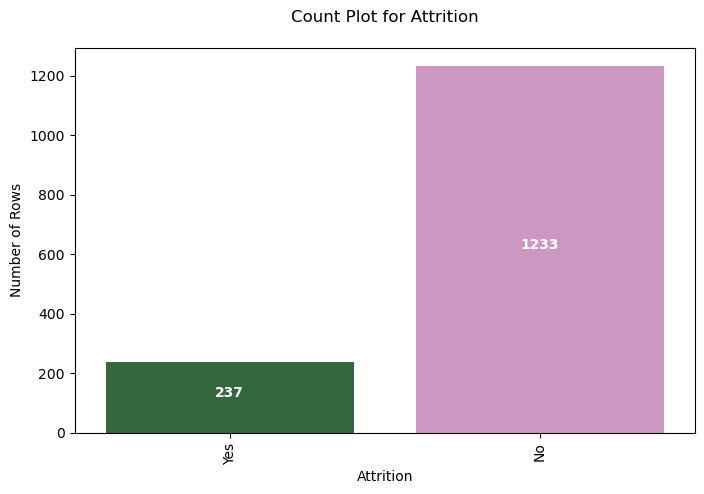

In [13]:
plt.figure(figsize=(8,5))
col_name='Attrition'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name], palette='cubehelix')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2,values[i.get_text()], horizontalalignment='center', fontweight='bold', color='w')
    index+=1
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of Rows")
plt.xticks(rotation=90)
plt.show()

The target label is too much imbalanced and is in need to be treated for same.

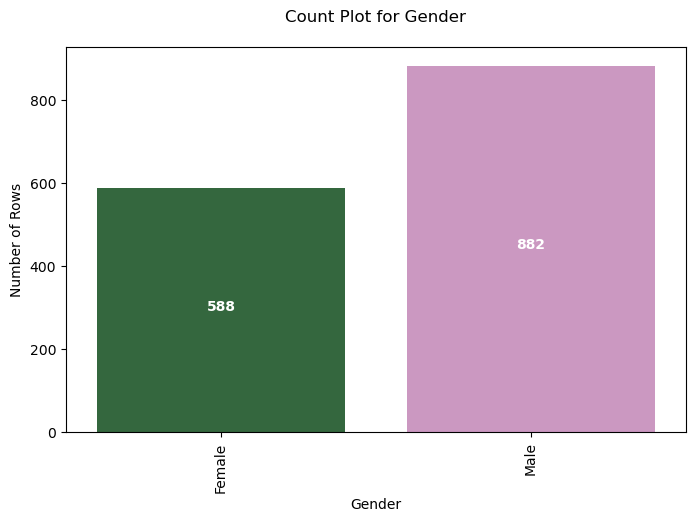

In [14]:
plt.figure(figsize=(8,5))
col_name='Gender'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name], palette='cubehelix')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2,values[i.get_text()], horizontalalignment='center', fontweight='bold', color='w')
    index+=1
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of Rows")
plt.xticks(rotation=90)
plt.show()

The number of male employees is higher than female employees.

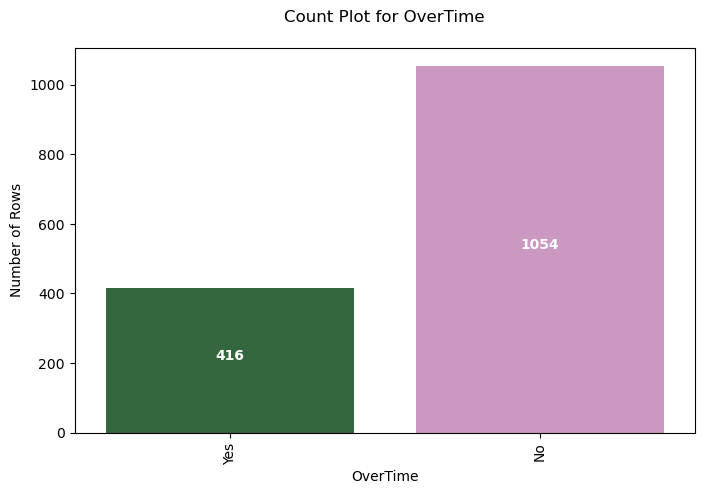

In [15]:
plt.figure(figsize=(8,5))
col_name='OverTime'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name], palette='cubehelix')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2,values[i.get_text()], horizontalalignment='center', fontweight='bold', color='w')
    index+=1
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of Rows")
plt.xticks(rotation=90)
plt.show()

The number of employees who prefer doing overtime is less in comparison to employees who dont prefer doing overtime.

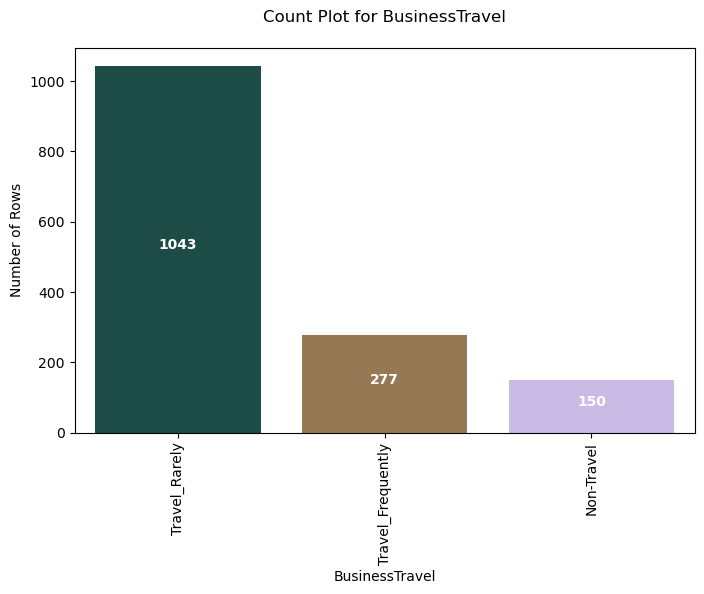

In [16]:
plt.figure(figsize=(8,5))
col_name='BusinessTravel'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name], palette='cubehelix')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2,values[i.get_text()], horizontalalignment='center', fontweight='bold', color='w')
    index+=1
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of Rows")
plt.xticks(rotation=90)
plt.show()

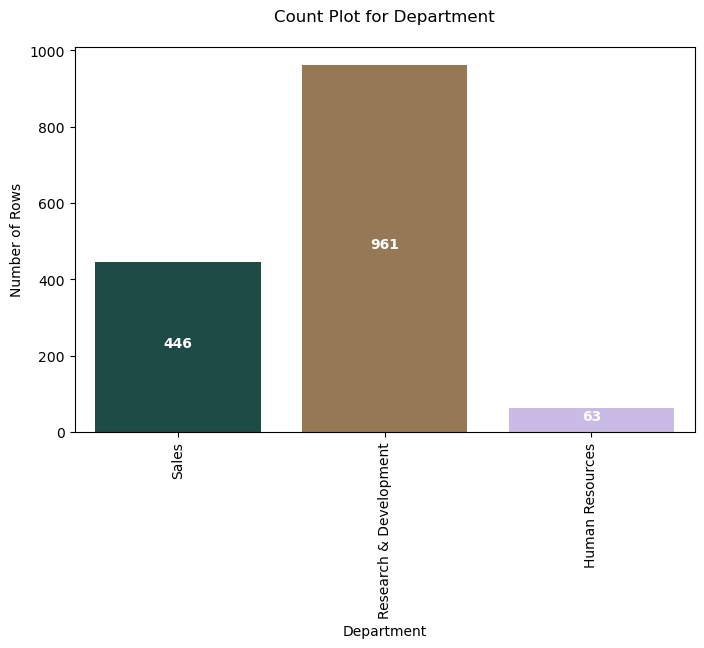

In [17]:
plt.figure(figsize=(8,5))
col_name='Department'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name], palette='cubehelix')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2,values[i.get_text()], horizontalalignment='center', fontweight='bold', color='w')
    index+=1
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of Rows")
plt.xticks(rotation=90)
plt.show()

The values for research and development department is highest and the least number of employees are in HR department.

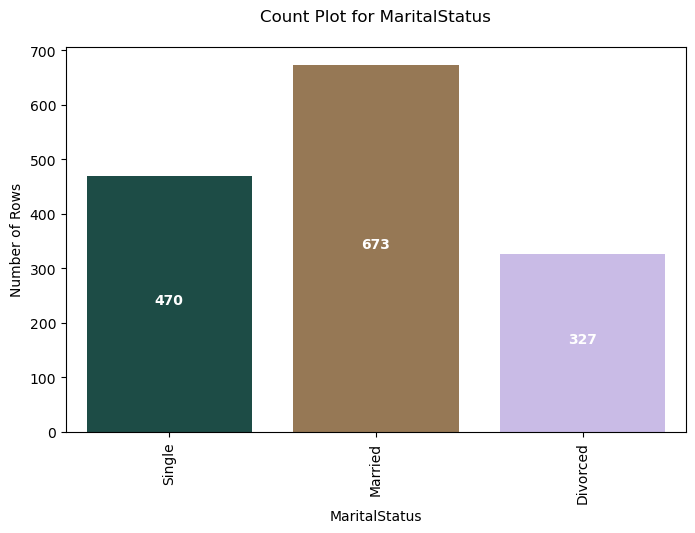

In [18]:
plt.figure(figsize=(8,5))
col_name='MaritalStatus'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name], palette='cubehelix')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2,values[i.get_text()], horizontalalignment='center', fontweight='bold', color='w')
    index+=1
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of Rows")
plt.xticks(rotation=90)
plt.show()

The highest number of employees are married and divorced employees are slightly lower than single employees.

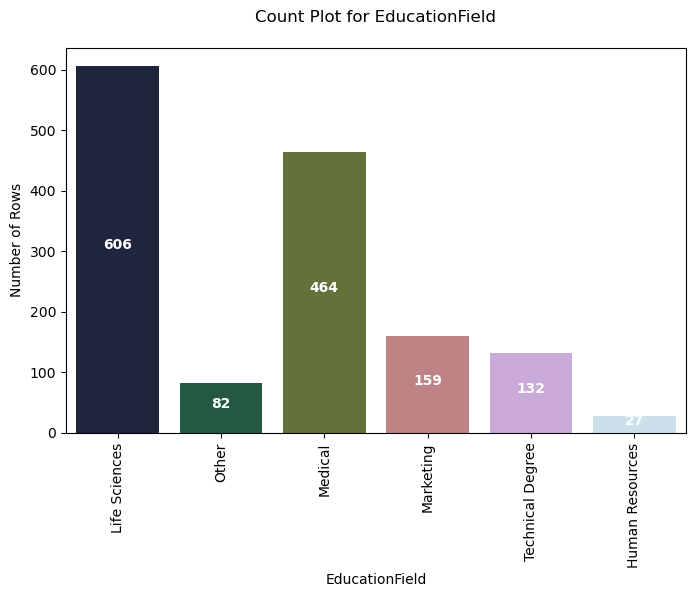

In [19]:
plt.figure(figsize=(8,5))
col_name='EducationField'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name], palette='cubehelix')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2,values[i.get_text()], horizontalalignment='center', fontweight='bold', color='w')
    index+=1
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of Rows")
plt.xticks(rotation=90)
plt.show()

Majority of employees are educated from LifeScience field and the least are from Human Resources field.

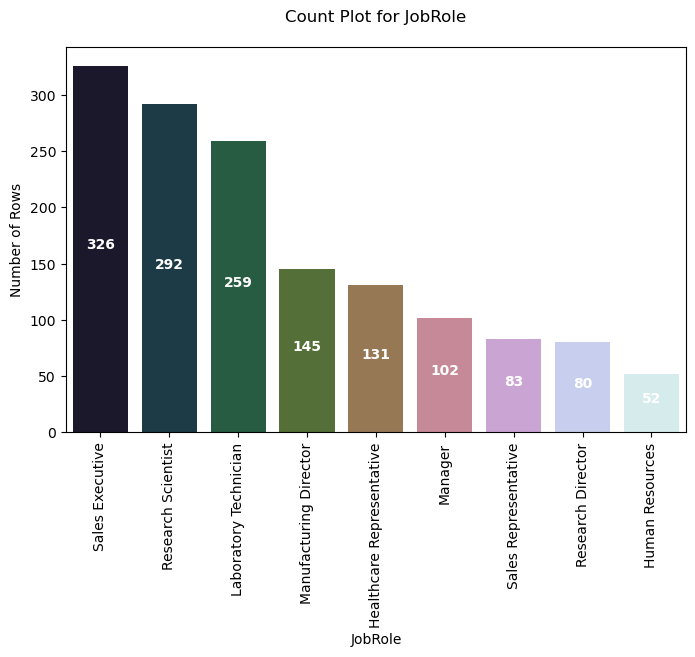

In [20]:
plt.figure(figsize=(8,5))
col_name='JobRole'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name], palette='cubehelix')
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2,values[i.get_text()], horizontalalignment='center', fontweight='bold', color='w')
    index+=1
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of Rows")
plt.xticks(rotation=90)
plt.show()

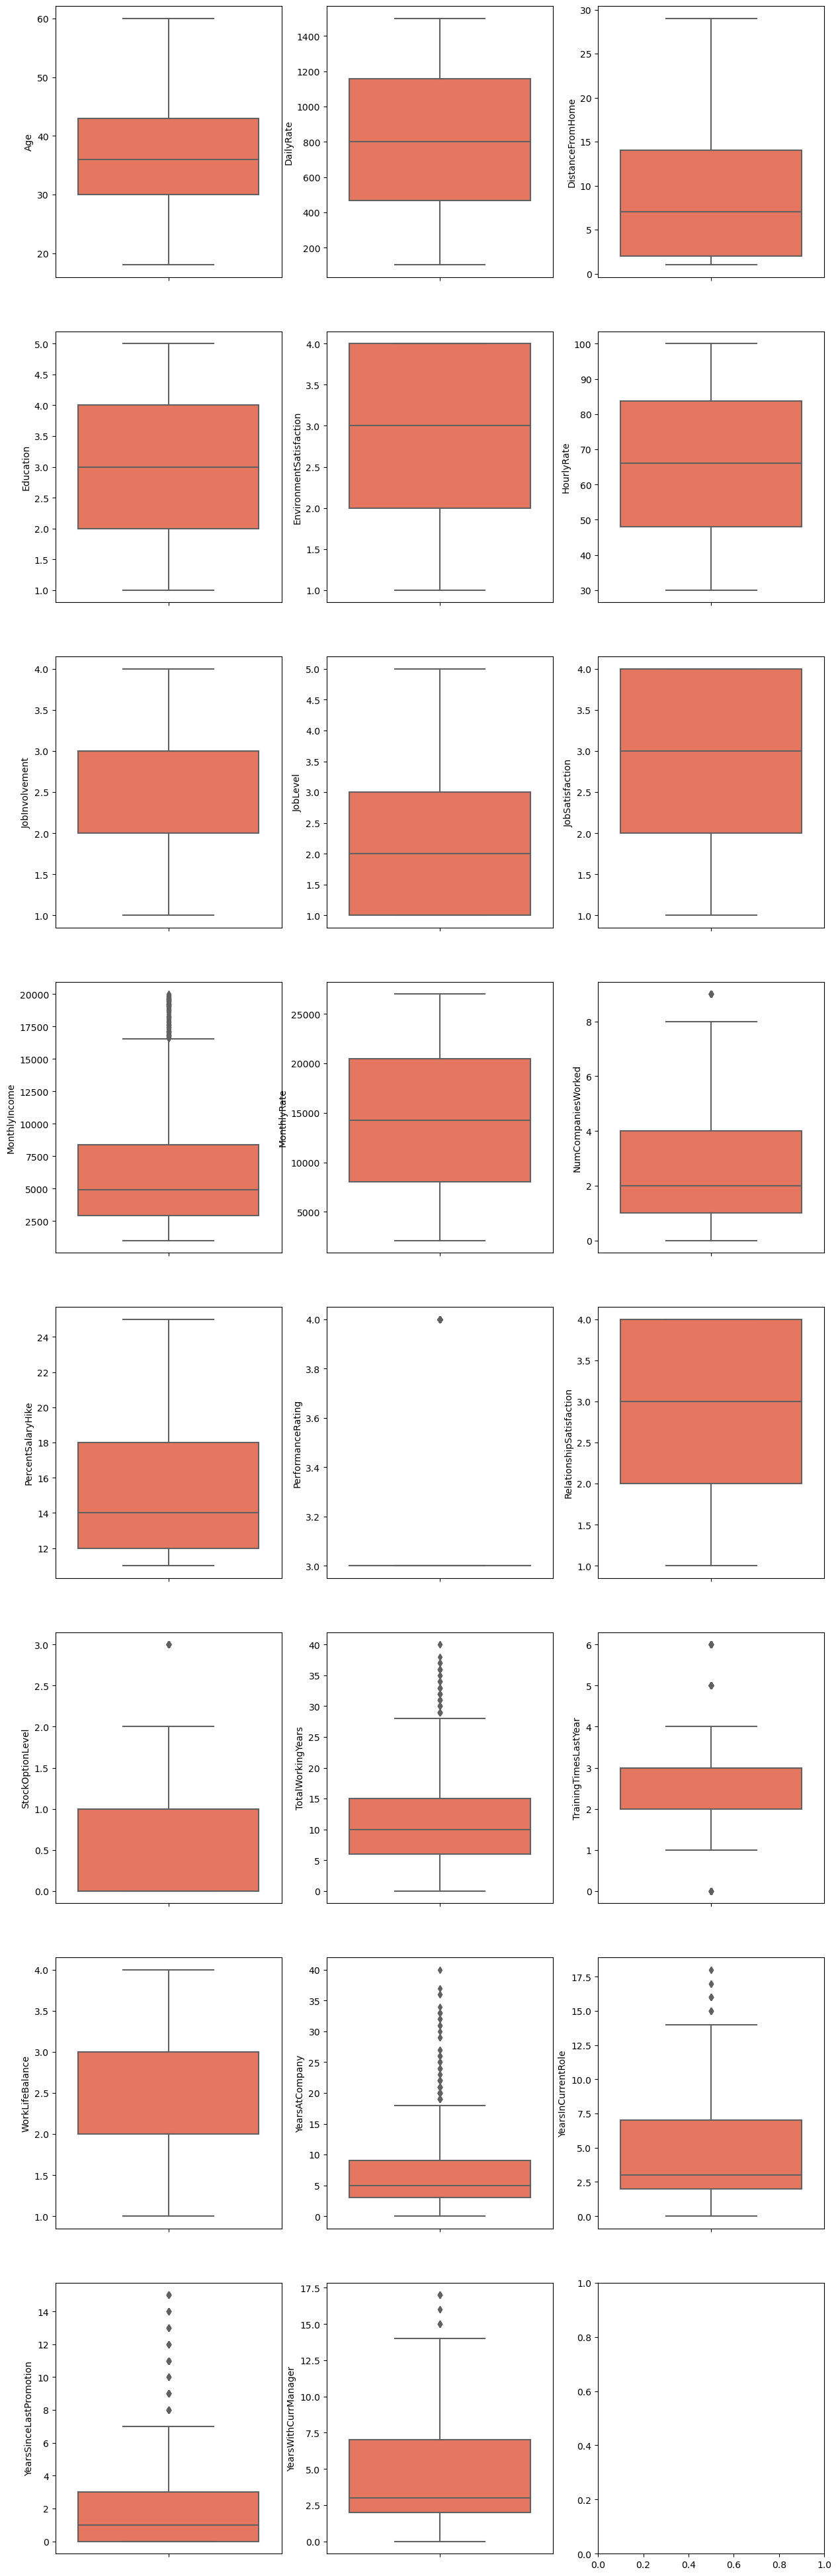

In [21]:
fig, ax=plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index=0
ax=ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index],palette="Reds")
    index+=1
plt.show()

We created a boxplot visual for our all integer datatype columns to check for outliers.
We can see some columns with presence of outliers which needs to be treated accordingly.

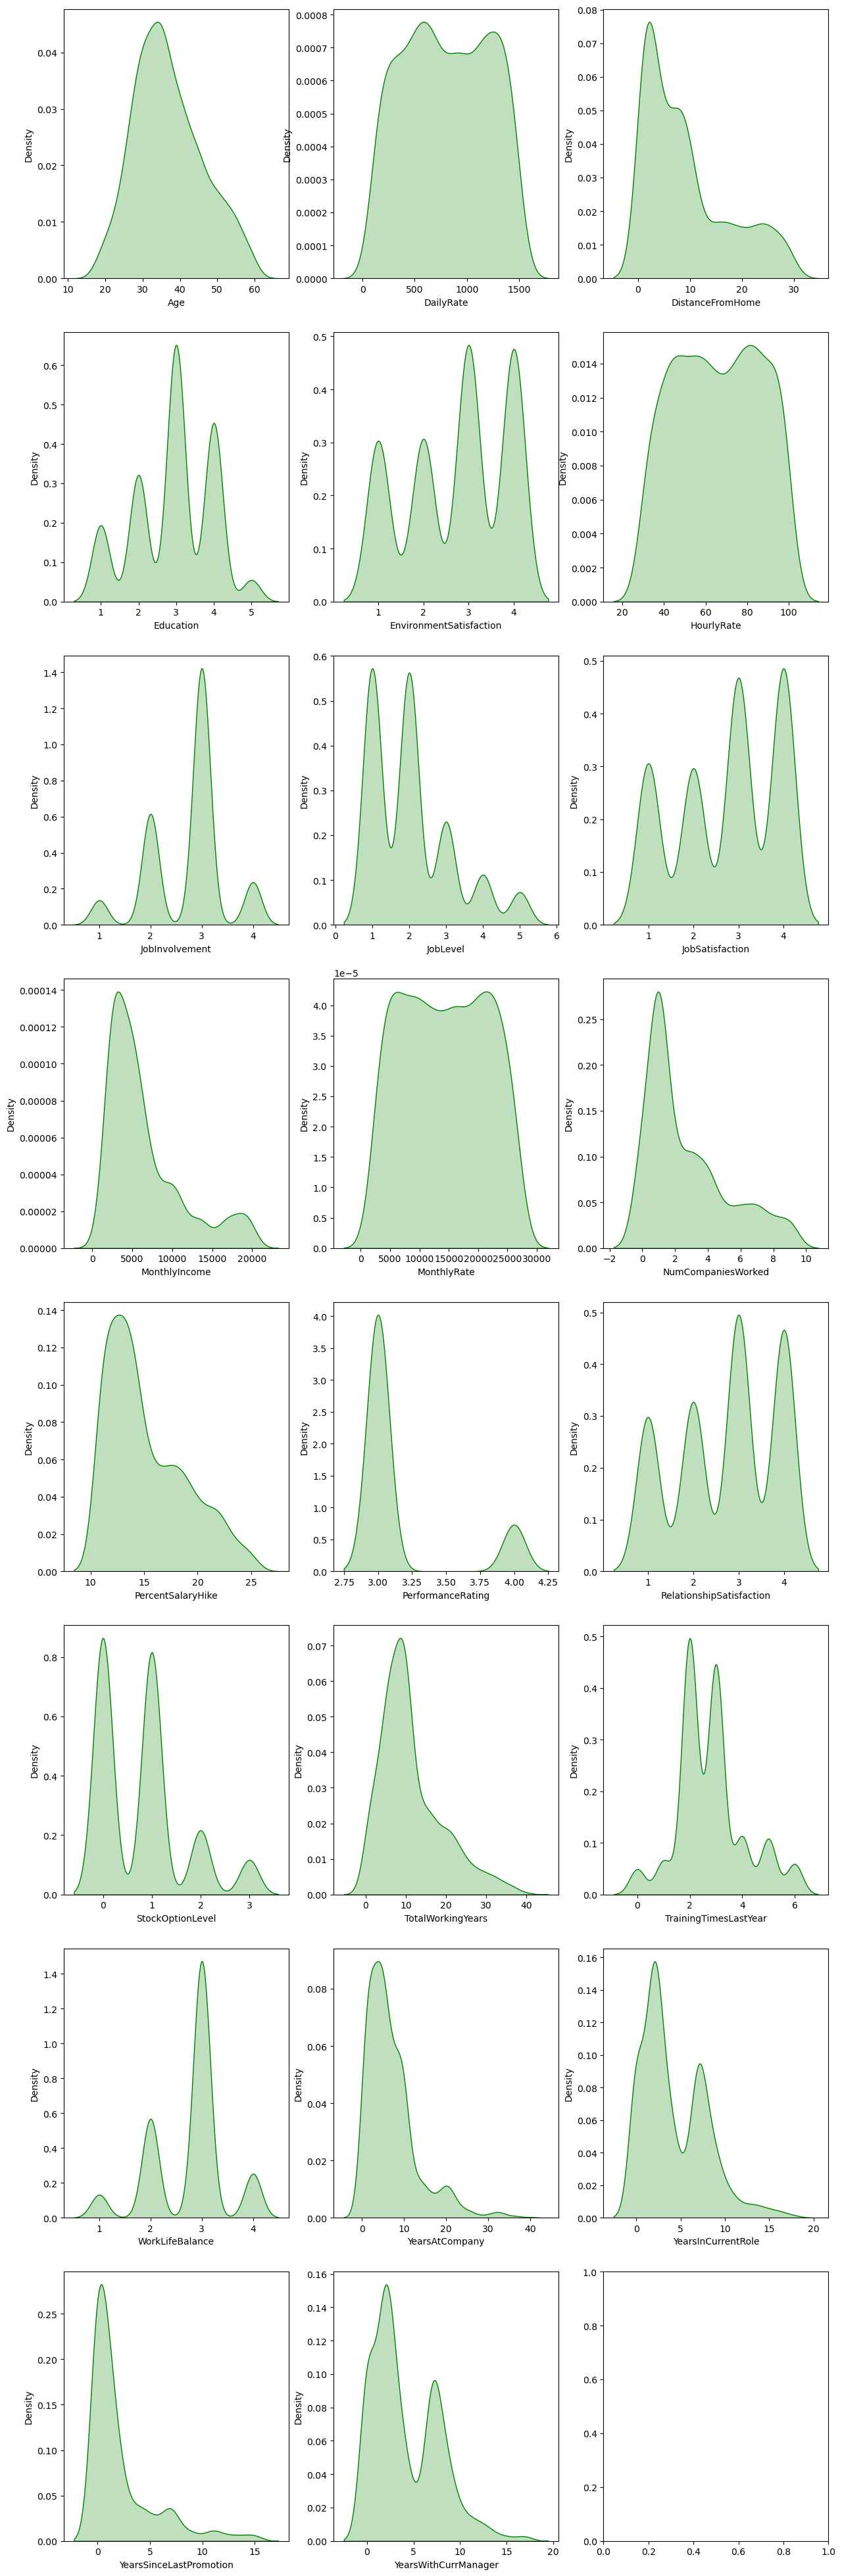

In [22]:
fig, ax=plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index=0
ax=ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color='g',kde_kws={"shade":True})
    index+=1
plt.show()

From the above distplot we are able to see the presence of skewness in few columns.

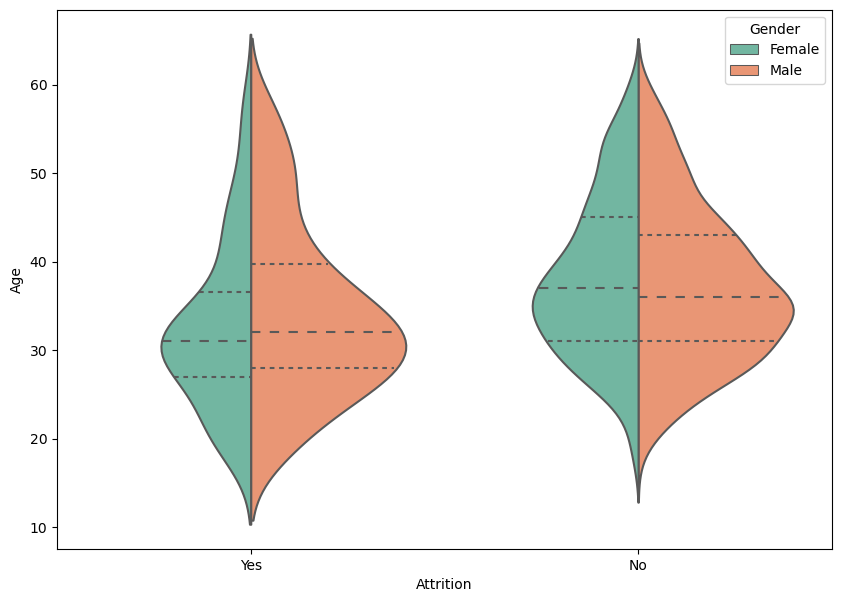

In [23]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above plot it can be seen that the Attrition count in both the male and female is high in there 20's and 30's.

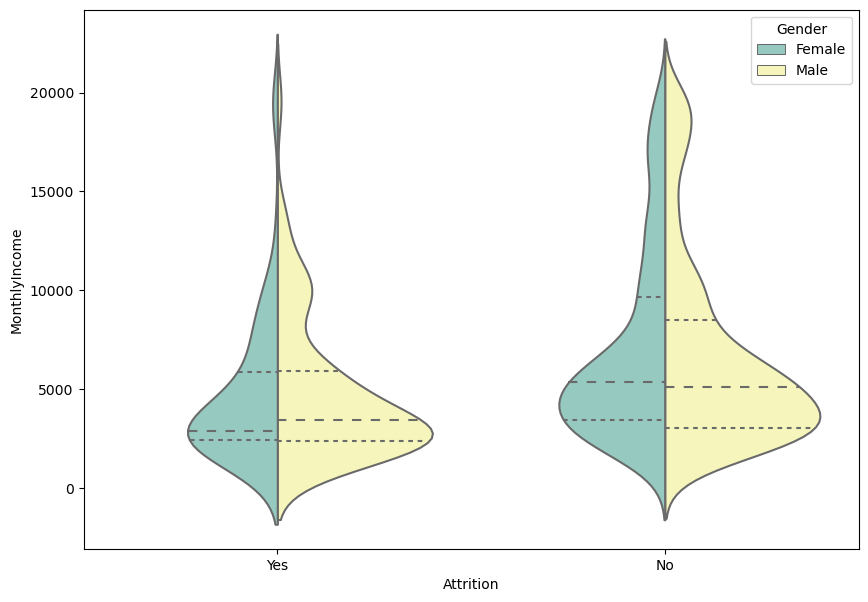

In [24]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

It is clear that the Attrition peaks for both the female and male when the monthly income is less than 5000.

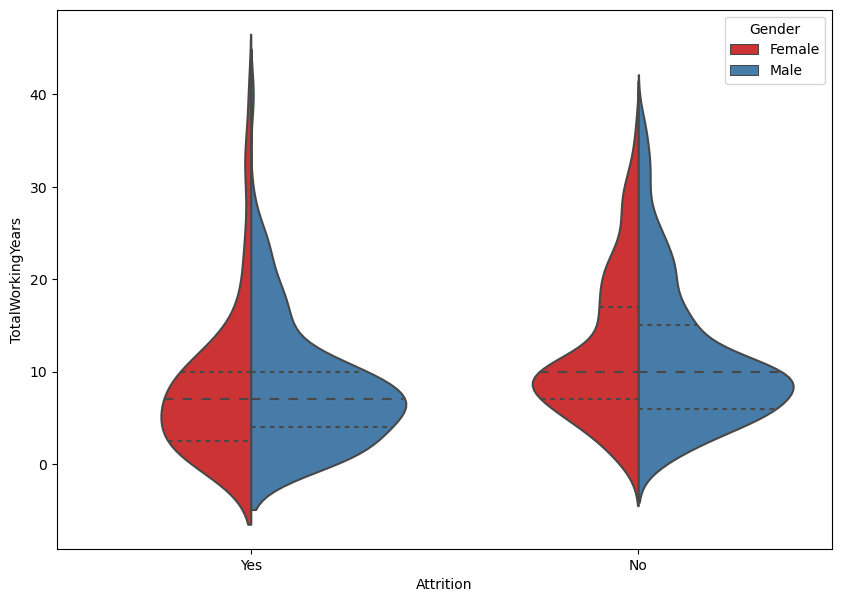

In [25]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above plot it can be seen that Attrition for both male and female employees occur when they are on working experience of 1-10 years.

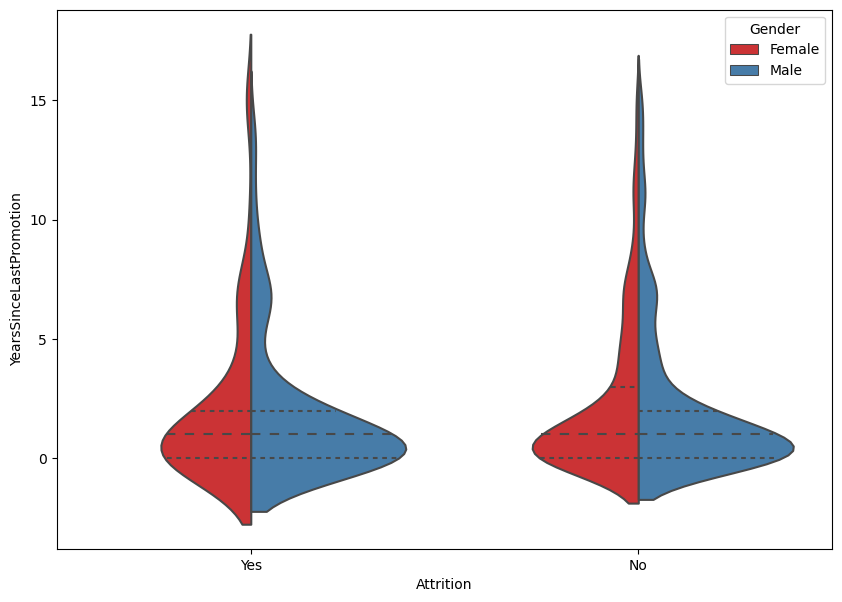

In [26]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

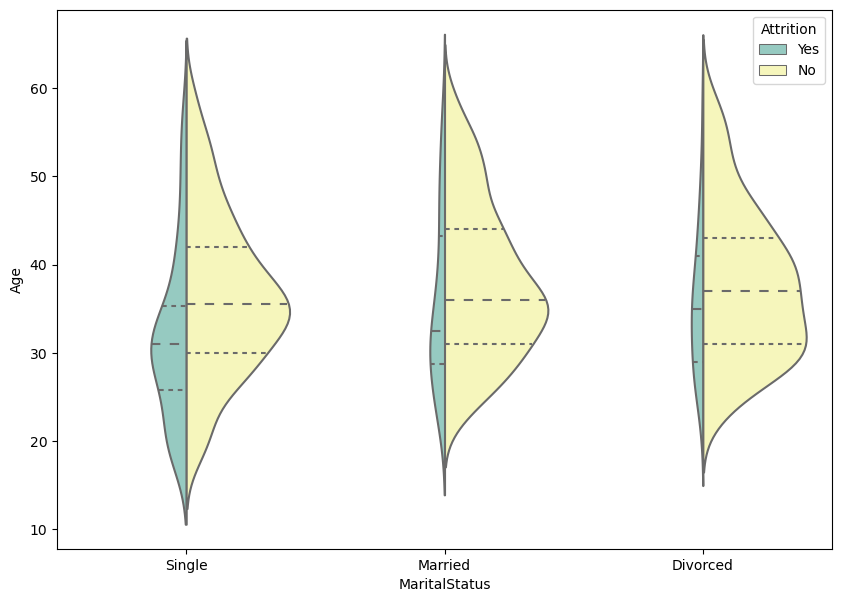

In [27]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

The attrition rate is quite lower inj employees when they are married or divorced as compared to when they are single.

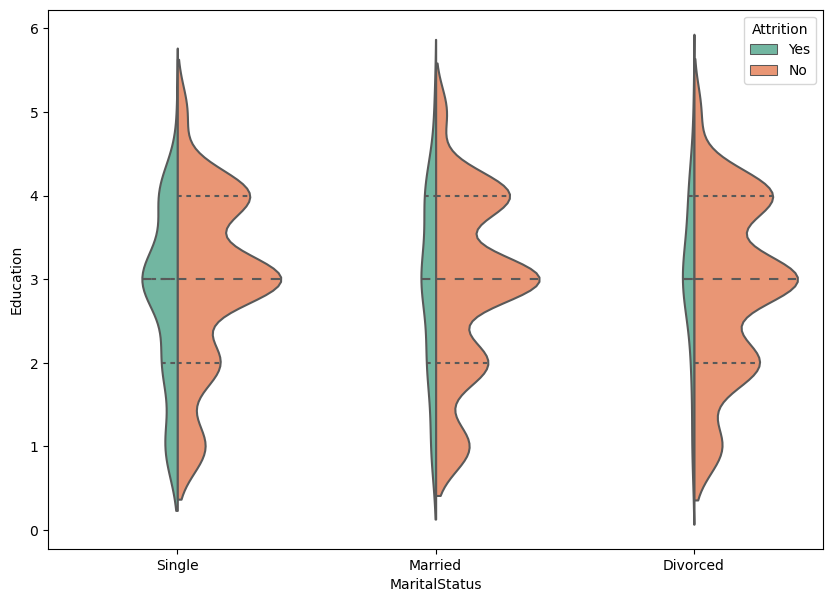

In [28]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

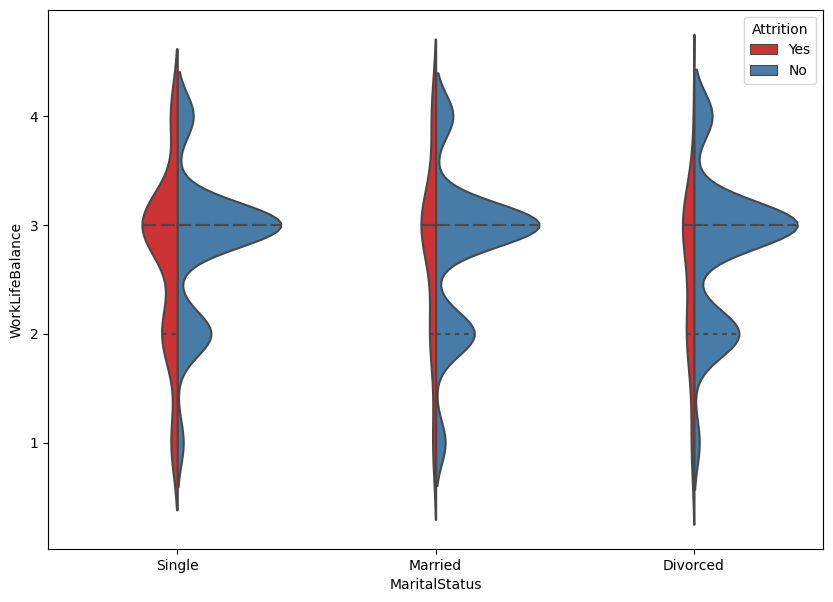

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

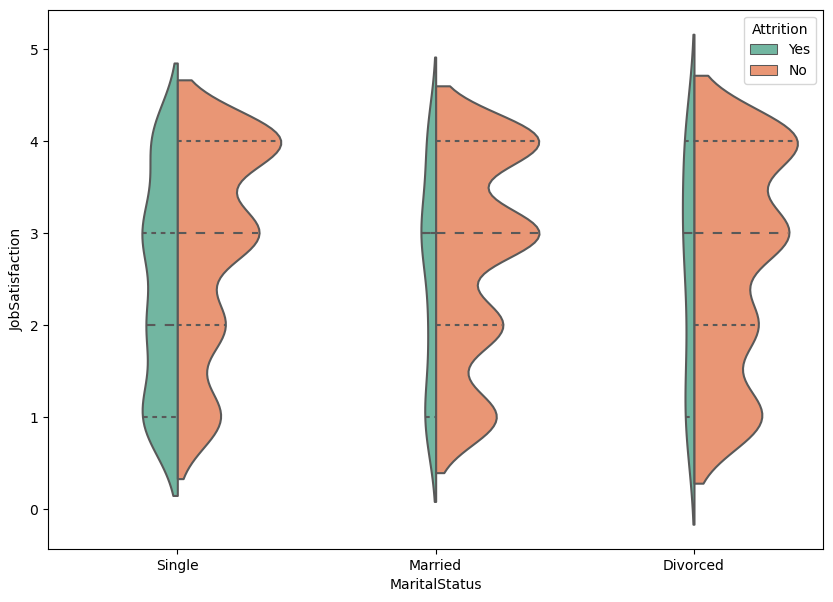

In [30]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Job satisfaction part of singles in not good as compared to employees who are married or divorced.

# ENCODING THE CATEGORICAL OBJECT DATATYPE COLUMNS

In [31]:
#Label Encoder
le=LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

We are using label encoder on our target column because we want our labels to be converted from the object datatype to numerical datatype.

In [32]:
df["Attrition"]=le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [33]:
#ORDINAL ENCODER
oe=OrdinalEncoder()
df['BusinessTravel']=oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department']=oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField']=oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender']=oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole']=oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus']=oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime']=oe.fit_transform(df['OverTime'].values.reshape(-1,1))

Using the ordinal encoder to convert all the categorical columns from object datatype to integer datatype.

In [34]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8
1469,34,0,2.0,628,1.0,8,3,3.0,2,1.0,...,3,1,0,6,3,4,4,3,1,2


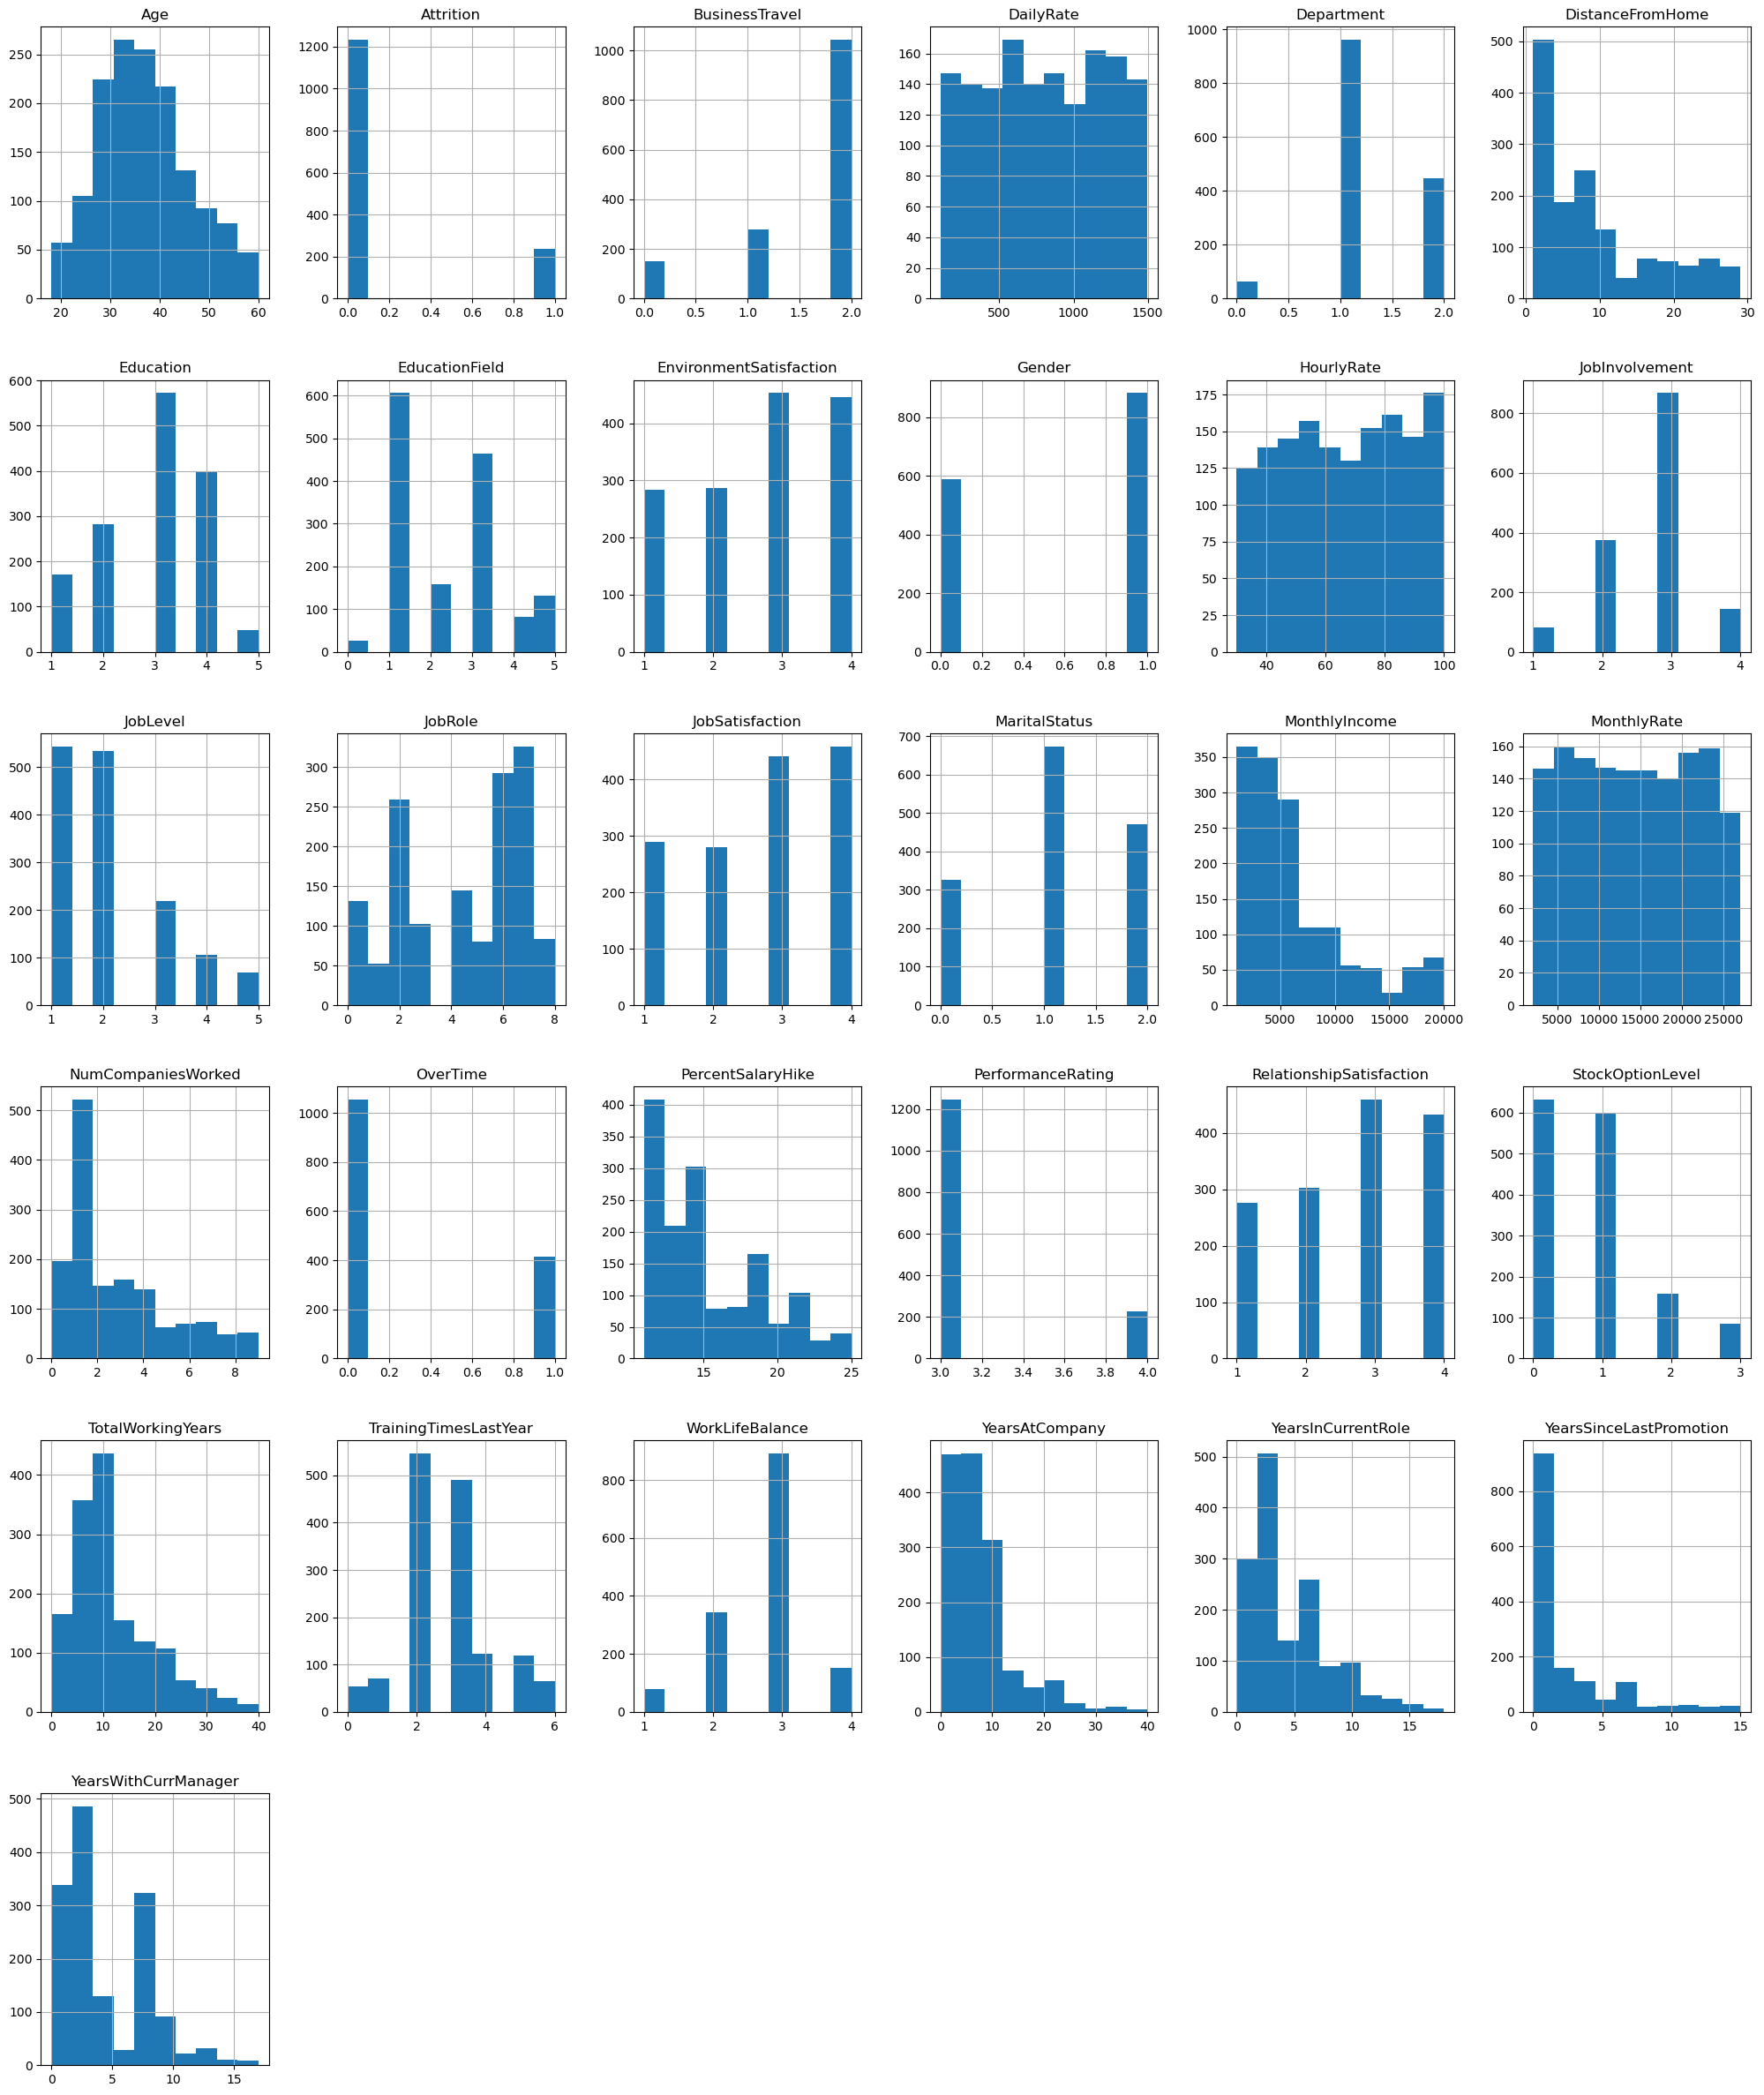

In [35]:
df.hist(figsize=(25,30))
plt.show()

# USING Z SCORE TO REMOVE OUTLIERS

In [36]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print("Shape of the dataframe before removing outliers is : ",df.shape)
print("Shape of the dataframe after removing outliers is : ",df1.shape)
print("The %AGE of data lost after removing outlier is : ",(df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy()

Shape of the dataframe before removing outliers is :  (1470, 31)
Shape of the dataframe after removing outliers is :  (1387, 31)
The %AGE of data lost after removing outlier is :  5.646258503401361


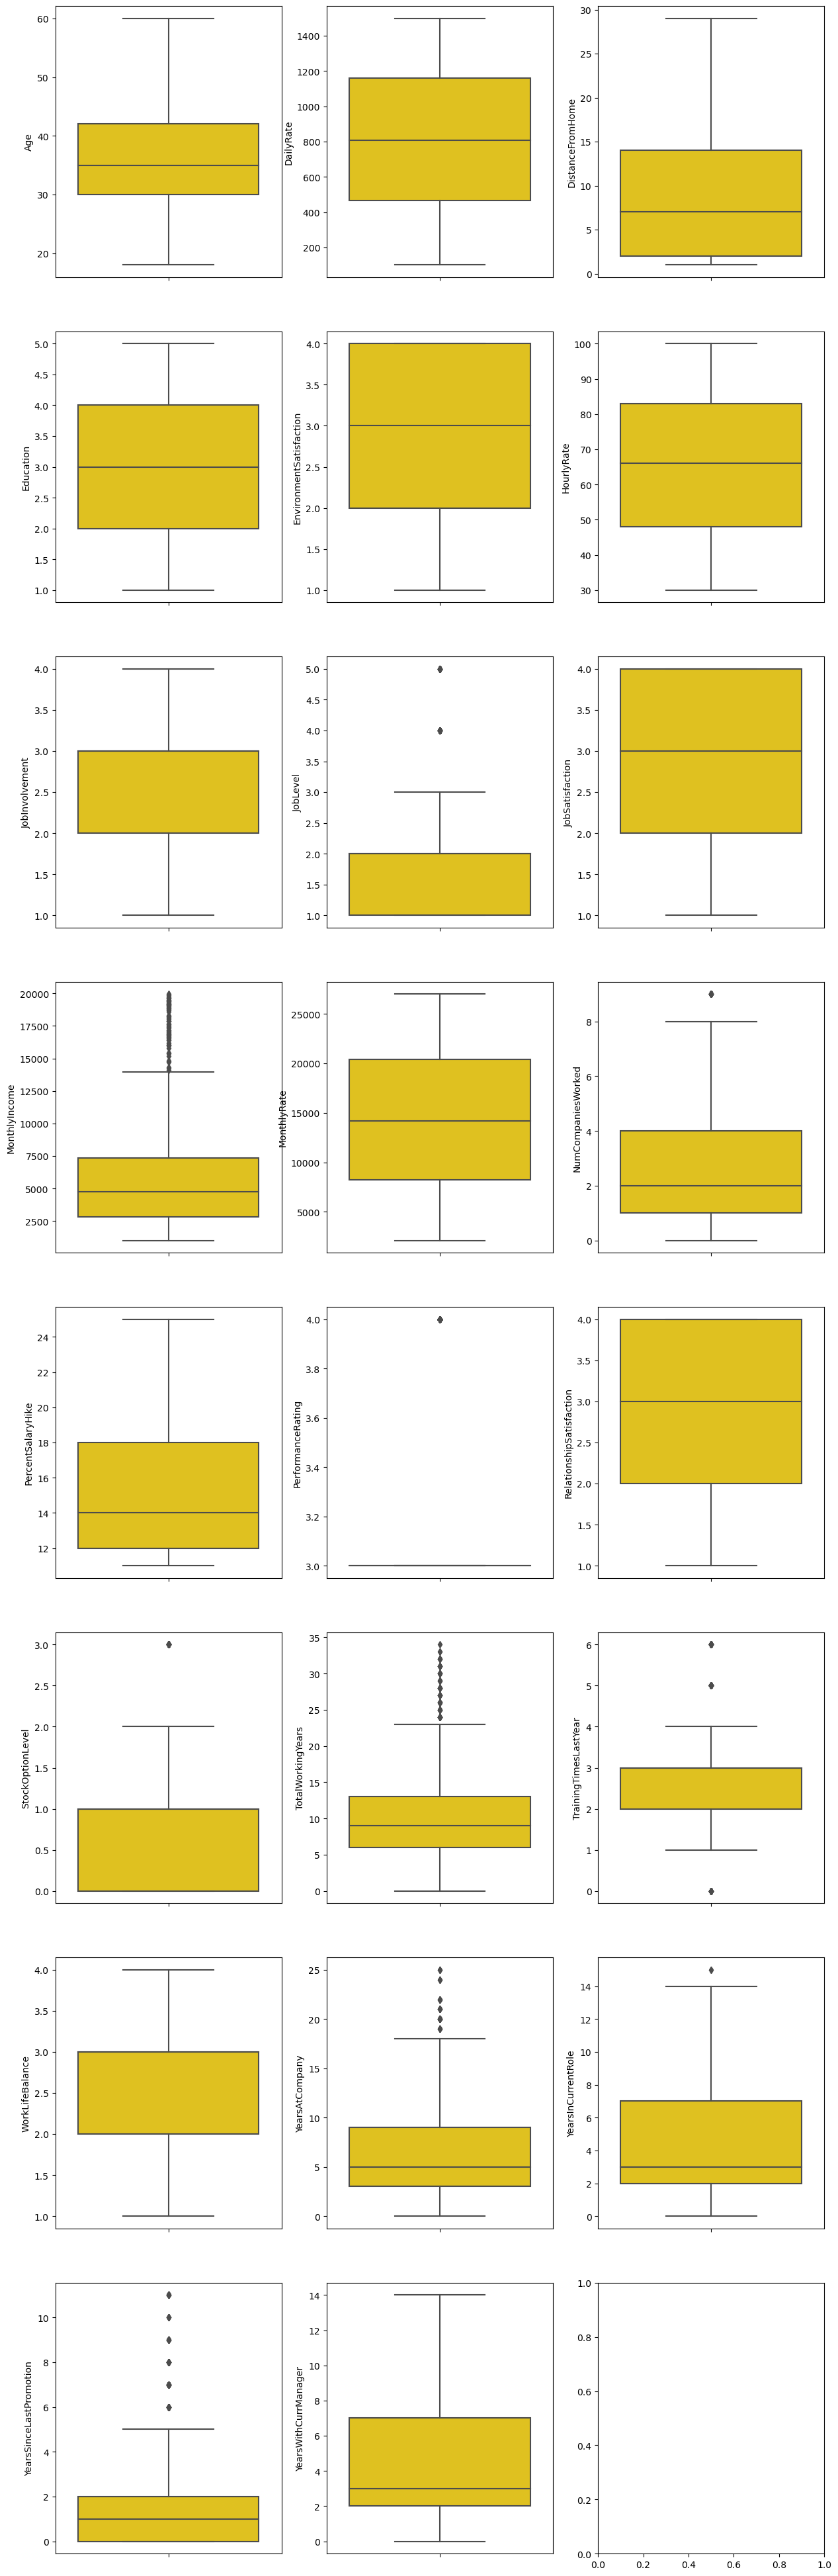

In [37]:
fig, ax=plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index=0
ax=ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df,ax=ax[index], palette="prism")
    index+=1
plt.show()

In [38]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

Using the skew method we can see that there are columns present in our dataset that are above the acceptable range +/-0.5

# USING LOG TRANSFORM TO FIX SKEWNESS

In [39]:
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

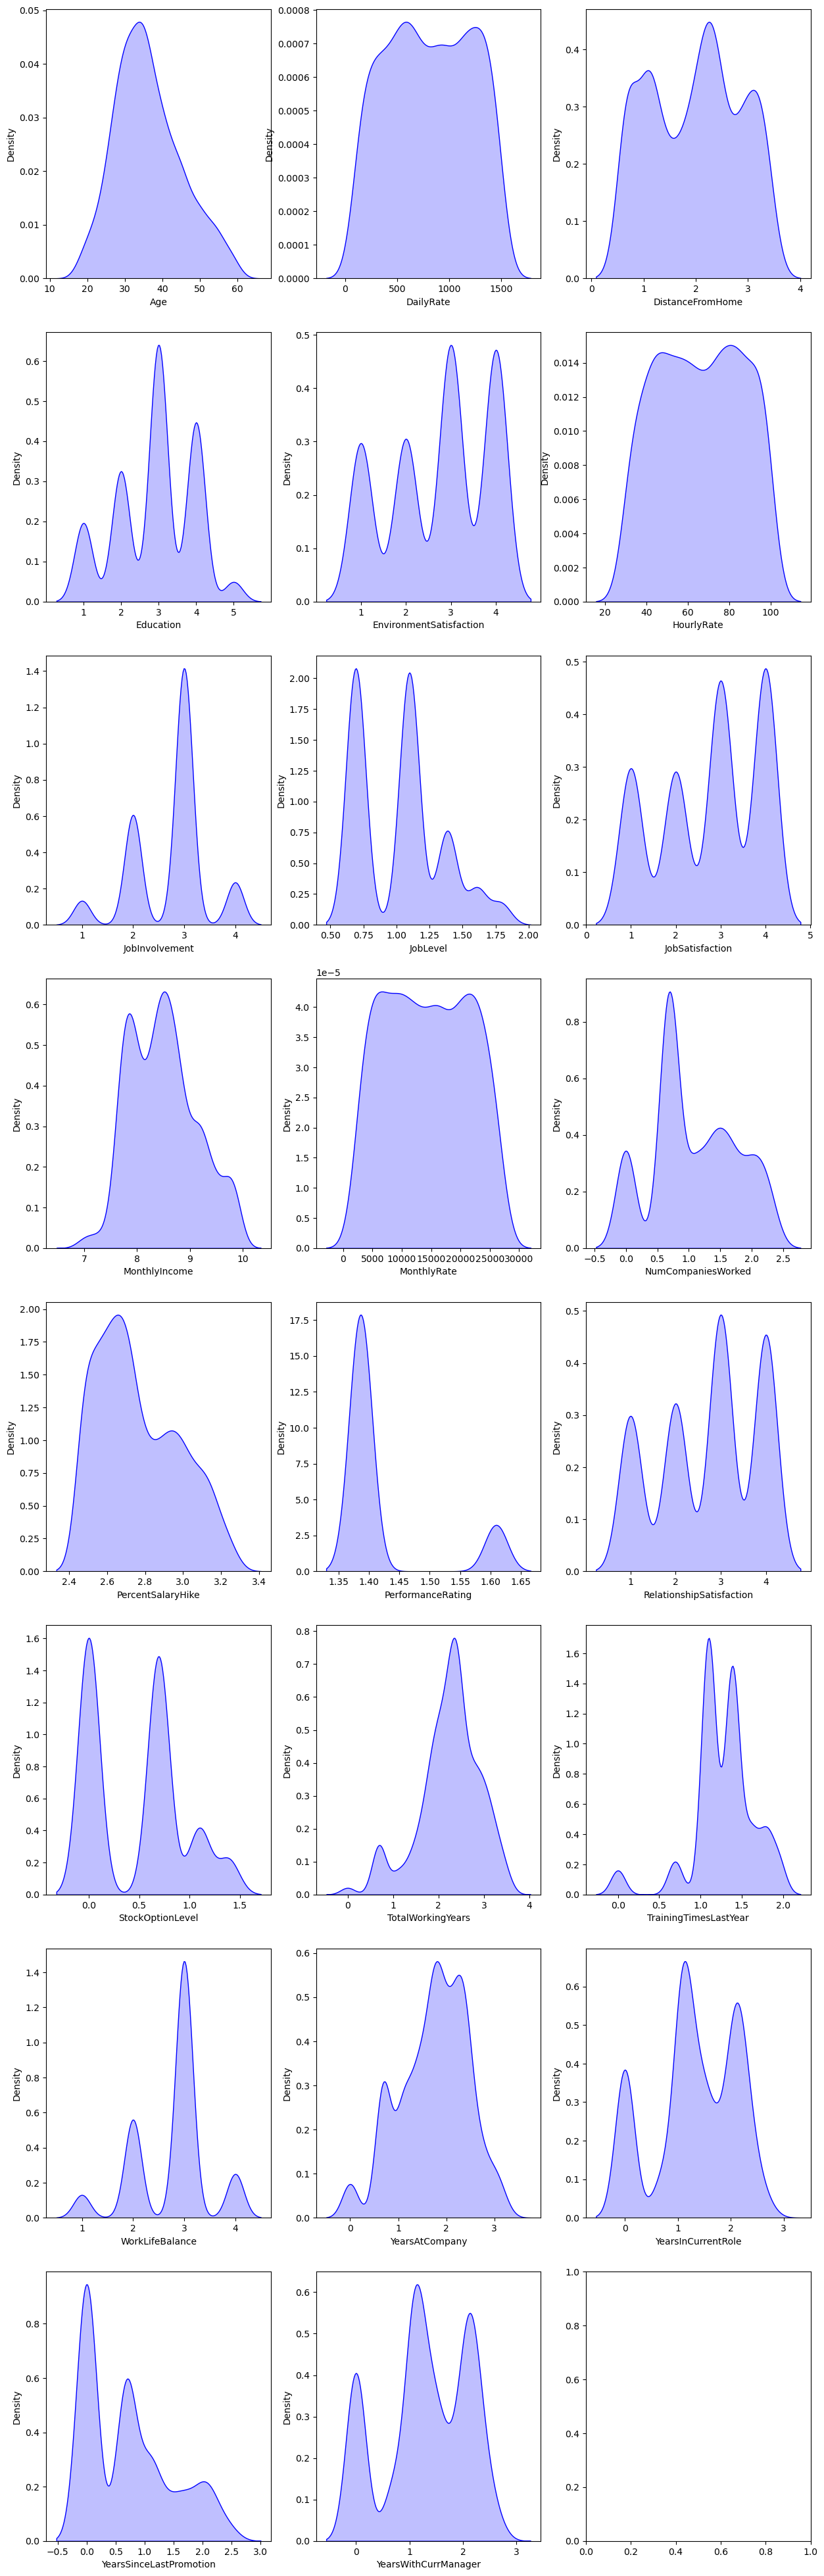

In [40]:
fig, ax=plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index=0
ax=ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, hist=False,ax=ax[index], color="b", kde_kws={"shade":True})
    index+=1
plt.show()

Somehow we managed to reduce the skewness from our numerical columns which can be seen in the above distribution plot.

# SPLITTING THE DATASET INTO 2 VARIABLES NAMELY X AND Y FOR FEATURE AND LABEL

In [41]:
X=df.drop('Attrition', axis=1)
Y=df['Attrition']

# RESOLVING THE CLASS IMBALANCE ISSUE IN LABEL COLUMN

In [42]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
oversample=SMOTE()
X,Y=oversample.fit_resample(X,Y)

SMOTE is the oversampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [45]:
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

# FEATURE SCALING

In [46]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.726761,0.65951,0.813517,1.386353,-1.709668,-0.756884,-1.024830,-0.440897,-1.375873,1.529382,...,-0.471940,-1.448503,-0.951069,0.167877,-3.403580,-2.154164,0.518648,0.574984,-0.980984,0.854167
1,1.664007,-1.02006,-1.293065,-0.596833,0.167981,-1.789241,-1.024830,0.495908,0.836203,-0.222872,...,2.474008,1.432745,0.650748,0.464729,0.374093,0.555064,1.182511,1.214193,0.032543,1.234334
2,0.258137,0.65951,1.507180,-0.596833,-1.203496,-0.756884,1.347860,1.432713,0.836203,1.423185,...,-0.471940,-0.488087,-0.951069,-0.006359,0.374093,0.555064,-2.339450,-1.613866,-0.980984,-1.513609
3,-0.210486,-1.02006,1.555813,-0.596833,-0.844362,1.307831,-1.024830,1.432713,-1.375873,-0.488365,...,-0.471940,0.472329,-0.951069,0.167877,0.374093,0.555064,0.887772,1.214193,1.046070,-1.513609
4,-0.913421,0.65951,-0.494458,-0.596833,-1.203496,-1.789241,0.556963,-1.377702,0.836203,-1.337943,...,-0.471940,1.432745,0.650748,-0.203892,0.374093,0.555064,-0.725839,-0.119743,0.625418,-0.061813


# FINDING BEST RANDOM STATE FOR BUILDING REGRESSION MODELS

In [47]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred=lr.predict(X_test)
    accu_score=(accuracy_score(Y_test, pred))*100
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("The best r2Score is", maxAccu, "at Random State", maxRS)

The best r2Score is 88.94645941278065 at Random State 895


# CREATING THE TRAINING AND TSTING DATASETS

In [48]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=53)

I took 25 percent of the complete dataset for training purpose and the remaining 75 percent will be used to train the machine learning models using random state as 53.

In [49]:
def classify(model, X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=53)
    
    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    
    accu_score=(accuracy_score(Y_test, pred))*100
    print("ACCURACY SCORE is= ", accu_score)
    
    class_report=classification_report(Y_test, pred)
    print("CLASSIFICATION REPORT is = ", class_report)
    
    cv_score=(cross_val_score(model, X,Y, cv=5).mean())*100
    print("Cross Validation Score is = ", cv_score)
    
    result=accu_score-cv_score
    print("Accuracy score - Cross validation score is= ", result)

In [50]:
#LOGISTIC REGRESSION MODEL
model=LogisticRegression()
classify(model,X,Y)

ACCURACY SCORE is=  87.04663212435233
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.86      0.89      0.87       289
           1       0.88      0.86      0.87       290

    accuracy                           0.87       579
   macro avg       0.87      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579

Cross Validation Score is =  84.67565353392418
Accuracy score - Cross validation score is=  2.3709785904281517


In [51]:
#SUPPORT VECTOR CLASSIFIER

model=SVC(C=1.0 ,random_state=53,kernel='rbf', gamma='auto')
classify(model, X, Y)

ACCURACY SCORE is=  92.91882556131262
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.92      0.94      0.93       289
           1       0.94      0.92      0.93       290

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579

Cross Validation Score is =  90.07578014448498
Accuracy score - Cross validation score is=  2.8430454168276356


In [52]:
#DECISION TREE CLASSIFIER

model=DecisionTreeClassifier(random_state=26, max_depth=15)
classify(model,X,Y)

ACCURACY SCORE is=  86.35578583765113
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.85      0.88      0.86       289
           1       0.87      0.85      0.86       290

    accuracy                           0.86       579
   macro avg       0.86      0.86      0.86       579
weighted avg       0.86      0.86      0.86       579

Cross Validation Score is =  82.7801258657928
Accuracy score - Cross validation score is=  3.575659971858329


In [53]:
#RANDOM FOREST CLASSIFIER
model=RandomForestClassifier(max_depth=15, random_state=200)
classify(model,X,Y)

ACCURACY SCORE is=  94.47322970639033
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.92      0.98      0.95       289
           1       0.98      0.91      0.94       290

    accuracy                           0.94       579
   macro avg       0.95      0.94      0.94       579
weighted avg       0.95      0.94      0.94       579

Cross Validation Score is =  90.90107618976688
Accuracy score - Cross validation score is=  3.5721535166234446


In [54]:
#KNEIGHBORS CLASSIFIER

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

ACCURACY SCORE is=  79.44732297063904
CLASSIFICATION REPORT is =                precision    recall  f1-score   support

           0       0.95      0.62      0.75       289
           1       0.72      0.97      0.82       290

    accuracy                           0.79       579
   macro avg       0.83      0.79      0.79       579
weighted avg       0.83      0.79      0.79       579

Cross Validation Score is =  78.67124078349595
Accuracy score - Cross validation score is=  0.7760821871430892


# HYPER PARAMETER TUNING ON THE BEST ML MODEL

In [55]:
fmod_params={'criterion':["gini","entropy"],
            'splitter':["best","random"],
            'min_samples_split':[2,3,4],
            'max_depth':[4,6,8],
            'random_state':[53,230,356]}

In [56]:
GSCV=GridSearchCV(DecisionTreeClassifier(),fmod_params, cv=200)
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=200, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [53, 230, 356],
                         'splitter': ['best', 'random']})

In [57]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 2,
 'random_state': 53,
 'splitter': 'best'}

In [58]:
GSCV.best_score_

0.8531944444444445

The Grid SearchCV provided the best score details.

In [59]:
Final_Model=DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=2, random_state=230, splitter="best")
Classifier=Final_Model.fit(X_train, Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_acc=(accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the best model is= ", fmod_acc)

Accuracy score for the best model is=  84.97409326424871


Succesfully incorporated the Hyper Parameter Tuning on my Final Model and got the accuracy score for it.

# SAVING THE FINAL MODEL

In [60]:
filename="HR FINAL MODEL.pkl"
joblib.dump(Final_Model,filename)

['HR FINAL MODEL.pkl']


# >>>>>>>DONE<<<<<<<